# INFORMATION AND SOCIAL NETWORK
problem : Lakukan analisis dari dataset di internet untuk mendapatkan informasi yang  mudah dipahami

## Dataset Acquisition
Dataset yang saya pakai termasuk dalam kategori public dataset yang disediakan oleh research institution atau organisasi yang terlibat dalam analisis data atau penelitian, dimana dataset ini menggambarkan sejumlah besar koneksi antarkarakter yang ada dalam serial "Game of Thrones" dalam bentuk grafik yang terstruktur. Setiap baris dalam dataset mencatat dua karakter yang terhubung, jenis hubungan , kekuatan , serta sumbernya.


## Analysis Requirement

### Dataset Description

In [ ]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
import tqdm as tqdm

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


Kode tersebut adalah serangkaian impor dan konfigurasi awal yang diperlukan untuk pengembangan dan analisis data menggunakan Python di notebook Jupyter. Ini mencakup impor pustaka seperti NetworkX untuk analisis jaringan, pandas untuk manipulasi data, dan Matplotlib untuk visualisasi. Selain itu, beberapa pengaturan seperti pengaturan ukuran default gambar, pengabaian pesan peringatan, dan penyesuaian tampilan HTML juga dilakukan. Ini semua bertujuan untuk menyediakan lingkungan kerja yang efisien dan siap pakai untuk analisis data dan visualisasi.

In [ ]:
bookme = []
for i in range(5):
    bookme.append(pd.read_csv('asoiaf-book1-edges.csv'.format(i+1)))

Kode tersebut merupakan sebuah loop yang membaca beberapa file CSV  dan kemudian menyimpannya ke dalam sebuah list yang disebut "bookme". Loop ini berjalan sebanyak lima kali , yang berarti nilai "i" akan berubah dari 0 hingga 4. Dalam setiap iterasi, kode membaca file CSV dengan nama "'asoiaf-book1-edges.csv'", tetapi dengan menambahkan nomor urut berdasarkan nilai "i". Misalnya, pada iterasi pertama, kode akan membaca file "'asoiaf-book1-edges.csv'", sedangkan pada iterasi kedua, akan membaca "'asoiaf-book2-edges.csv'", dan seterusnya hingga iterasi kelima. Setelah membaca setiap file, hasilnya ditambahkan ke dalam list "bookme".

In [ ]:
all_books = pd.concat(bookme)

Kode "pd.concat(bookme)" digunakan untuk menggabungkan semua DataFrames yang ada dalam list "bookme" menjadi satu DataFrame tunggal. Fungsi "concat" dari pustaka Pandas digunakan untuk melakukan penggabungan DataFrames baik secara berurutan maupun secara bersamaan berdasarkan sumbu tertentu.  pemanggilan "pd.concat(bookme)" akan menghasilkan satu DataFrame tunggal yang berisi data dari semua file yang telah dibaca sebelumnya menggunakan loop yang telah dijelaskan sebelumnya. Dengan demikian, "all_books" akan berisi gabungan dari semua data yang terdapat dalam file CSV "'asoiaf-book1-edges.csv'".

In [ ]:
all_books.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


"all_books.head()" digunakan untuk menampilkan lima baris pertama dari DataFrame "all_books". Metode ".head()" dari pustaka Pandas digunakan untuk melihat sebagian data awal dari sebuah DataFrame secara cepat.

In [ ]:
edges = all_books.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()

Perintah "edges = all_books.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()" digunakan untuk mengelompokkan data berdasarkan kolom 'Source' (sumber) dan 'Target' (tujuan) dalam DataFrame "all_books", kemudian menghitung total bobot (weight) untuk setiap kelompok yang dihasilkan. Hasilnya disimpan dalam DataFrame baru yang disebut "edges". Proses ".reset_index()" digunakan untuk mengembalikan indeks DataFrame ke bentuk default setelah pengelompokkan, sehingga indeks baru akan dibuat secara otomatis.

In [ ]:
edges.sort_values('weight',ascending=False).head()

,Source,Target,weight
329,Eddard-Stark,Robert-Baratheon,1455
134,Bran-Stark,Robb-Stark,560
62,Arya-Stark,Sansa-Stark,520
249,Daenerys-Targaryen,Drogo,505
479,Joffrey-Baratheon,Sansa-Stark,435


perintah diatas digunakan untuk mengurutkan datasecara ascending dengan menampilkan headnya

In [ ]:
num_nodes = len(G.nodes())
num_edges = len(G.edges())
network_size = G.size()

kode diatas digunakan untuk menghitung panjang nodes dan edgesnya lalu mengambil size dari jaringan.

In [ ]:
print( num_nodes)
print( num_edges)
print( network_size)

187
684
684


kode diatas digunakan untuk menampilkan jumlah total dari nodes, edges dan network size.

In [ ]:
node_attributesme = nx.get_node_attributes(G, "attribute_name")
edge_attributesme = nx.get_edge_attributes(G, "attribute_name")

print({k: type(v) for k, v in node_attributesme.items()})
print({k: type(v) for k, v in edge_attributesme.items()})

{}
{}


kode diatas digunakan untuk print tipe data atribut dari node dan edges

In [ ]:
nodedata_types = {node: type(data) for node, data in G.nodes(data=True)}

print( nodedata_types)

{'Addam-Marbrand': <class 'dict'>, 'Jaime-Lannister': <class 'dict'>, 'Tywin-Lannister': <class 'dict'>, 'Aegon-I-Targaryen': <class 'dict'>, 'Daenerys-Targaryen': <class 'dict'>, 'Eddard-Stark': <class 'dict'>, 'Aemon-Targaryen-(Maester-Aemon)': <class 'dict'>, 'Alliser-Thorne': <class 'dict'>, 'Bowen-Marsh': <class 'dict'>, 'Chett': <class 'dict'>, 'Clydas': <class 'dict'>, 'Jeor-Mormont': <class 'dict'>, 'Jon-Snow': <class 'dict'>, 'Samwell-Tarly': <class 'dict'>, 'Aerys-II-Targaryen': <class 'dict'>, 'Brandon-Stark': <class 'dict'>, 'Gerold-Hightower': <class 'dict'>, 'Jon-Arryn': <class 'dict'>, 'Robert-Baratheon': <class 'dict'>, 'Aggo': <class 'dict'>, 'Drogo': <class 'dict'>, 'Jhogo': <class 'dict'>, 'Jorah-Mormont': <class 'dict'>, 'Quaro': <class 'dict'>, 'Rakharo': <class 'dict'>, 'Albett': <class 'dict'>, 'Halder': <class 'dict'>, 'Rast': <class 'dict'>, 'Grenn': <class 'dict'>, 'Pypar': <class 'dict'>, 'Tyrion-Lannister': <class 'dict'>, 'Alyn': <class 'dict'>, 'Harwin': <

kode diatas digunakan untuk menampilkan semua tipe data dari atribut node

In [ ]:
G = nx.from_pandas_edgelist(edges,
                            source='Source',
                            target='Target',
                            edge_attr='weight' )

kode diatas digunakan untuk membuat edgelist dari source , target dan weight.

### Network Characteristics

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

kode diatas digunakan untuk menghitung jumlah dari node dan edges

In [ ]:
nodesattributes = G.nodes(data=True)
edgesattributes = G.edges(data=True)

digunakan untuk mengambil semua node dan edges dalam graph dn menampilkan dalam tupel

In [ ]:
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

print("\nattributes:")
for node, attr in nodesattributes:
    print(f"Node {node}: {attr}")

Number of nodes: 187
Number of edges: 684

Nodes with attributes:
Node Addam-Marbrand: {}
Node Jaime-Lannister: {}
Node Tywin-Lannister: {}
Node Aegon-I-Targaryen: {}
Node Daenerys-Targaryen: {}
Node Eddard-Stark: {}
Node Aemon-Targaryen-(Maester-Aemon): {}
Node Alliser-Thorne: {}
Node Bowen-Marsh: {}
Node Chett: {}
Node Clydas: {}
Node Jeor-Mormont: {}
Node Jon-Snow: {}
Node Samwell-Tarly: {}
Node Aerys-II-Targaryen: {}
Node Brandon-Stark: {}
Node Gerold-Hightower: {}
Node Jon-Arryn: {}
Node Robert-Baratheon: {}
Node Aggo: {}
Node Drogo: {}
Node Jhogo: {}
Node Jorah-Mormont: {}
Node Quaro: {}
Node Rakharo: {}
Node Albett: {}
Node Halder: {}
Node Rast: {}
Node Grenn: {}
Node Pypar: {}
Node Tyrion-Lannister: {}
Node Alyn: {}
Node Harwin: {}
Node Jory-Cassel: {}
Node Tomard: {}
Node Arthur-Dayne: {}
Node Arya-Stark: {}
Node Benjen-Stark: {}
Node Bran-Stark: {}
Node Catelyn-Stark: {}
Node Cersei-Lannister: {}
Node Desmond: {}
Node Ilyn-Payne: {}
Node Jeyne-Poole: {}
Node Joffrey-Baratheon

Kkode diatas digunakan untuk mencetak node-node dalam graph

In [ ]:
degrees_weighted = dict(nx.degree(G,weight='weight'))
max_degree = max(degrees_weighted.values())

digunakan untuk membuat dict dari weight dan mengambil maksimul value

In [ ]:
import seaborn as sns

Kode untuk import seaborn dengan inisialisai sebagai sns

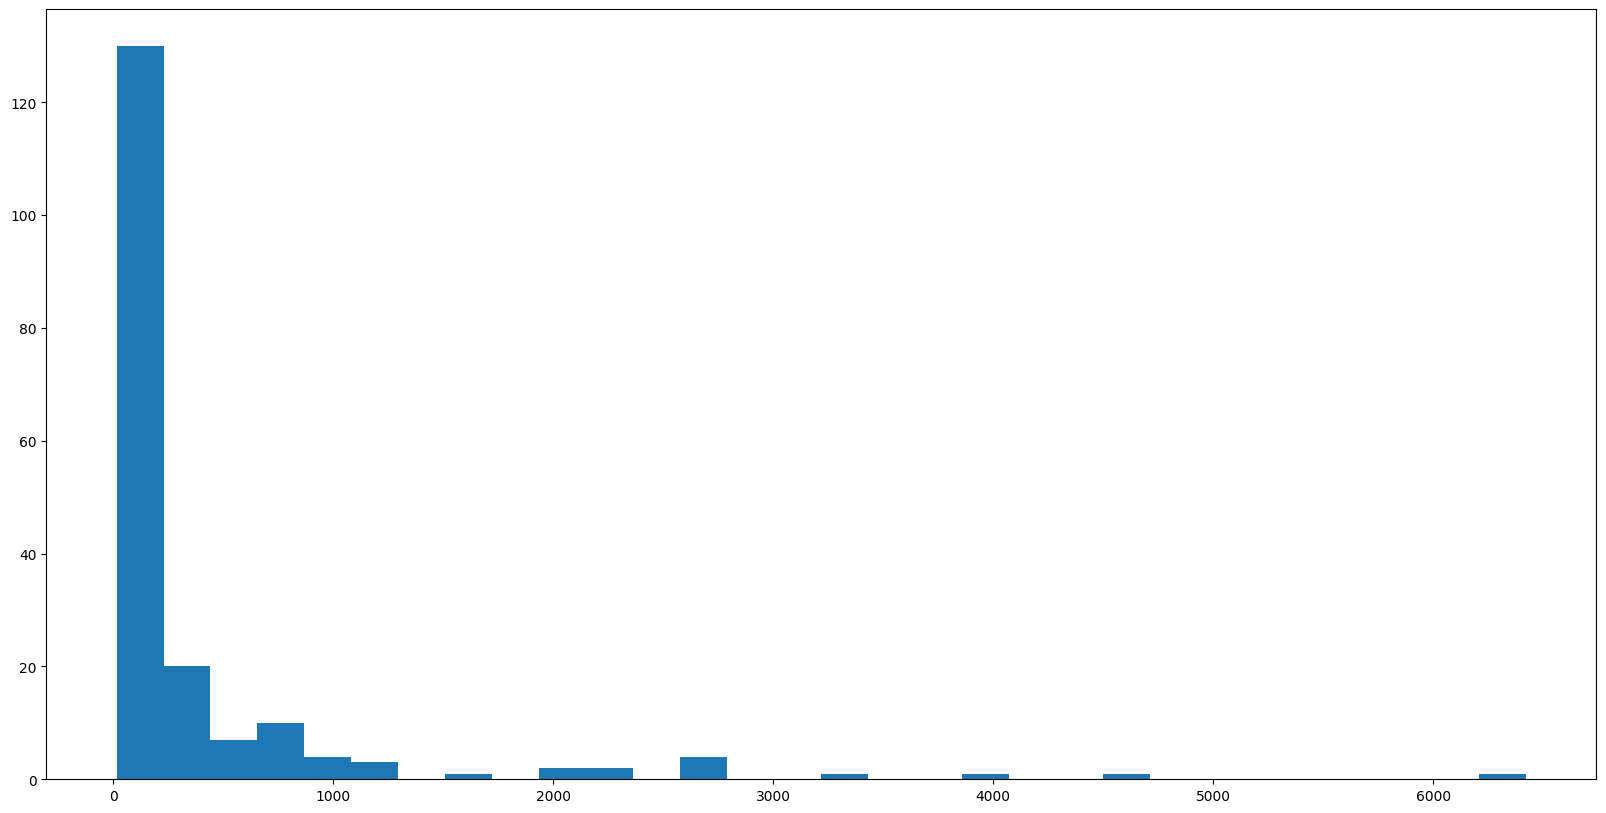

In [ ]:
h = plt.hist(weighted_degrees.values(), bins = 30)

Kode tersebut digunakan untuk memvisualisasikan distribusi frekuensi data dan  mengatur jumlah bin yang digunakan dalam pembuatan histogram. Histogram tersebut kemudian disimpan dalam variabel `h`.

In [ ]:
sequence_degree = sorted([d for n, d in G.degree()], reverse=True)

Kode tersebut menghasilkan urutan derajat dari setiap simpul dalam graf dan kemudian di sorting.

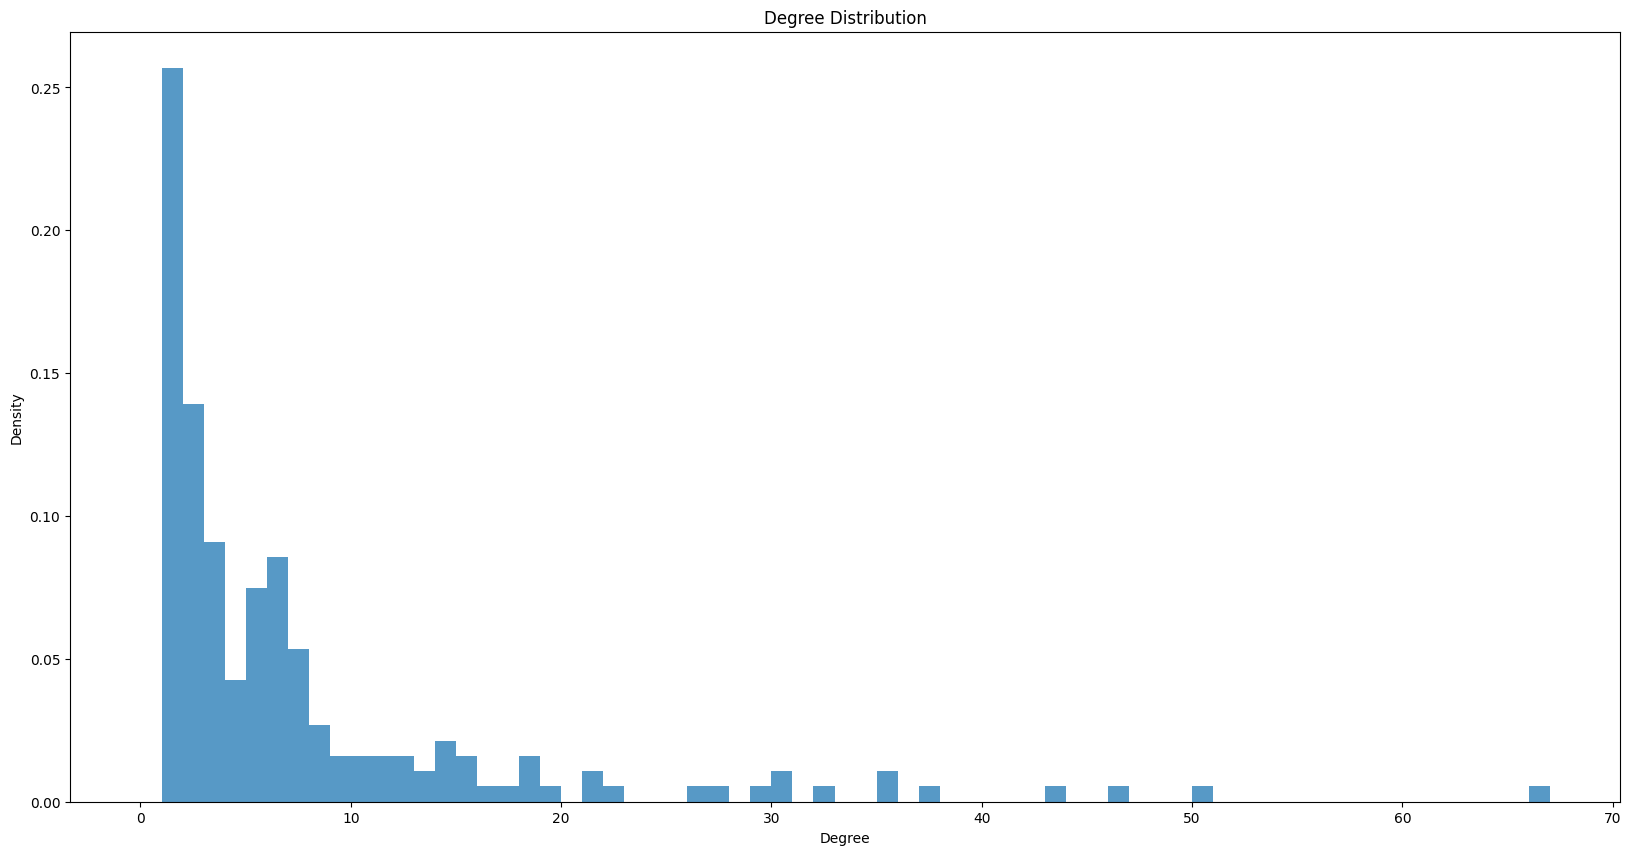

In [ ]:
plt.hist(sequence_degree, bins=range(max(sequence_degree) + 2))
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Density")
plt.show()

kode diatas digunakan untuk visualisasi drajat histogram yang menampilkan bagaimana distribusi drajat pada setiap nodes.

In [ ]:
density = nx.density(G)
print( density)

0.03933068828704502


Kode di atas menghitung kepadatan (density) dimana Density rasio dari jumlah sisi yang ada dengan sisi yang maksimal.

In [ ]:
coefficient_clustering= nx.average_clustering(G)
print(coefficient_clustering)

0.5121189412047715


Kode tersebut menghitung koefisien klaster rata-rata dari graph dan kemudian menampilkan nya.

### Community Detection

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman

communities_generator = girvan_newman(G)

Kode diatas menggunakan algoritma Girvan-Newman untuk mendeteksi komunitas dalam graf dengan cara membagi graph dengan kelompok-kelompok yang saling terkait.

In [ ]:
top_level= next(communities_generator)
next_level = next(communities_generator)

print( sorted(map(sorted, top_level)))
print( sorted(map(sorted, next_level)))

[['Addam-Marbrand', 'Aemon-Targaryen-(Maester-Aemon)', 'Aerys-II-Targaryen', 'Albett', 'Alliser-Thorne', 'Alyn', 'Arthur-Dayne', 'Arya-Stark', 'Arys-Oakheart', 'Balon-Greyjoy', 'Balon-Swann', 'Barristan-Selmy', 'Benjen-Stark', 'Beric-Dondarrion', 'Boros-Blount', 'Bowen-Marsh', 'Bran-Stark', 'Brandon-Stark', 'Bronn', 'Brynden-Tully', 'Catelyn-Stark', 'Cayn', 'Cersei-Lannister', 'Chella', 'Chett', 'Chiggen', 'Clement-Piper', 'Clydas', 'Colemon', 'Dareon', 'Daryn-Hornwood', 'Desmond', 'Donal-Noye', 'Donnel-Waynwood', 'Dywen', 'Eddard-Stark', 'Edmure-Tully', 'Eon-Hunter', 'Galbart-Glover', 'Gared', 'Gendry', 'Gerold-Hightower', 'Gregor-Clegane', 'Grenn', 'Gunthor-son-of-Gurn', 'Halder', 'Hali', 'Hallis-Mollen', 'Harwin', 'Harys-Swyft', 'Heward', 'High-Septon-(fat_one)', 'Hobb', 'Hodor', 'Hoster-Tully', 'Howland-Reed', 'Hugh', 'Hullen', 'Ilyn-Payne', 'Jacks', 'Jafer-Flowers', 'Jaime-Lannister', 'Janos-Slynt', 'Jaremy-Rykker', 'Jeor-Mormont', 'Jeyne-Poole', 'Joffrey-Baratheon', 'Jon-Arryn', 

kode diatas menampikan top level dari komunitis yang dihasilkan  dan kemudian di urutkan.

In [ ]:
communities = list(nx.algorithms.community.label_propagation.label_propagation_communities(G))
print( communities)

[{'Tytos-Blackwood', 'Tywin-Lannister', 'Cersei-Lannister', 'Hugh', 'Mance-Rayder', 'Jeyne-Poole', 'Alyn', 'Brandon-Stark', 'Tommen-Baratheon', 'Vayon-Poole', 'Pycelle', 'Jon-Umber-(Greatjon)', 'Howland-Reed', 'Sansa-Stark', 'Joseth', 'Beric-Dondarrion', 'Varly', 'Jory-Cassel', 'Robert-Arryn', 'Mya-Stone', 'Desmond', 'Eon-Hunter', 'High-Septon-(fat_one)', 'Jaime-Lannister', 'Rodrik-Cassel', 'Heward', 'Sandor-Clegane', 'Hallis-Mollen', 'Bran-Stark', 'Lyn-Corbray', 'Walder-Frey', 'Thoros-of-Myr', 'Edmure-Tully', 'Benjen-Stark', 'Gendry', 'Moreo-Tumitis', 'Mychel-Redfort', 'Leo-Lefford', 'Hodor', 'Raymun-Darry', 'Meryn-Trant', 'Lyanna-Stark', 'Rickon-Stark', 'Rickard-Stark', 'Karyl-Vance', 'Wyl-(guard)', 'Arthur-Dayne', 'Kevan-Lannister', 'Stevron-Frey', 'Tyrion-Lannister', 'Maegor-I-Targaryen', 'Jonos-Bracken', 'Daryn-Hornwood', 'Hullen', 'Stiv', 'Aerys-II-Targaryen', 'Brynden-Tully', 'Chiggen', 'Barristan-Selmy', 'Robert-Baratheon', 'Boros-Blount', 'Masha-Heddle', 'Arya-Stark', 'Marq-Pi

Kode tersebut menggunakan algoritma Label Propagation untuk mendeteksi komunitas dalam graf di mana setiap komunitas direpresentasikan sebagai himpunan node-node yang termasuk dalam komunitas tersebut.

### Centrality Measure

In [ ]:
degree_centrality = nx.degree_centrality(G)

top_5_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]

print("5 tertinggi dari Degree Centrality:")
for node in top_5_nodes:
    print("Node:", node, "- Degree Centrality:", degree_centrality[node])

Kode tersebut menghitung degree centrality untuk setiap node dimana node dengan drajat tertinggi memiliki perana penting dalam komunitas .

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

top_5_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]

for node in top_5_nodes:
    print("Node:", node, "- Betweenness Centrality:", betweenness_centrality[node])

Top 5 Nodes by Betweenness Centrality:
Node: Eddard-Stark - Betweenness Centrality: 0.2696038913836117
Node: Robert-Baratheon - Betweenness Centrality: 0.21403028397371796
Node: Tyrion-Lannister - Betweenness Centrality: 0.1902124972697492
Node: Jon-Snow - Betweenness Centrality: 0.17158135899829566
Node: Catelyn-Stark - Betweenness Centrality: 0.1513952715347627


Kode tersebut menghitung betweenness centrality untuk setiap node dalam graf dimana yang paling tertinggi nilainya brarti memiliki peranan penting karena fleksibel untuk mengakses node lain.

In [ ]:
closeness_centrality = nx.closeness_centrality(G)
for node in bottom_5_closeness:
    print("Node:", node, "- Closeness Centrality:", closeness_centrality[node])


Bottom 5 Nodes by Closeness Centrality:
Node: Hosteen-Frey - Closeness Centrality: 0.21112372304199772
Node: Jared-Frey - Closeness Centrality: 0.21112372304199772
Node: Fogo - Closeness Centrality: 0.21703617269544925
Node: Paxter-Redwyne - Closeness Centrality: 0.22275449101796407
Node: Clement-Piper - Closeness Centrality: 0.22572815533980584


Kode menampilkan sentraliti dengan cloness yang menghasilkan 5 node terbawah menjadi node yang paling berpengaruh dalam komunitas berbeda dengan jenis sentralitas yang lain.

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)

top_5_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]

for node in top_5_nodes:
    print("Node:", node, "- Eigenvector Centrality:", eigenvector_centrality[node])

Top 5 Nodes by Eigenvector Centrality:
Node: Eddard-Stark - Eigenvector Centrality: 0.2964089387184345
Node: Robert-Baratheon - Eigenvector Centrality: 0.2694880017758137
Node: Sansa-Stark - Eigenvector Centrality: 0.23155019835665291
Node: Tyrion-Lannister - Eigenvector Centrality: 0.22520388145217876
Node: Joffrey-Baratheon - Eigenvector Centrality: 0.22075394589376893


Kode tersebut menghitung eigenvector centrality untuk mengetahui node yang memiliki centralitas tinggi dibandingkan dengan drajat tertinggi dan ke posisi node yang terhubung .

### Visualization

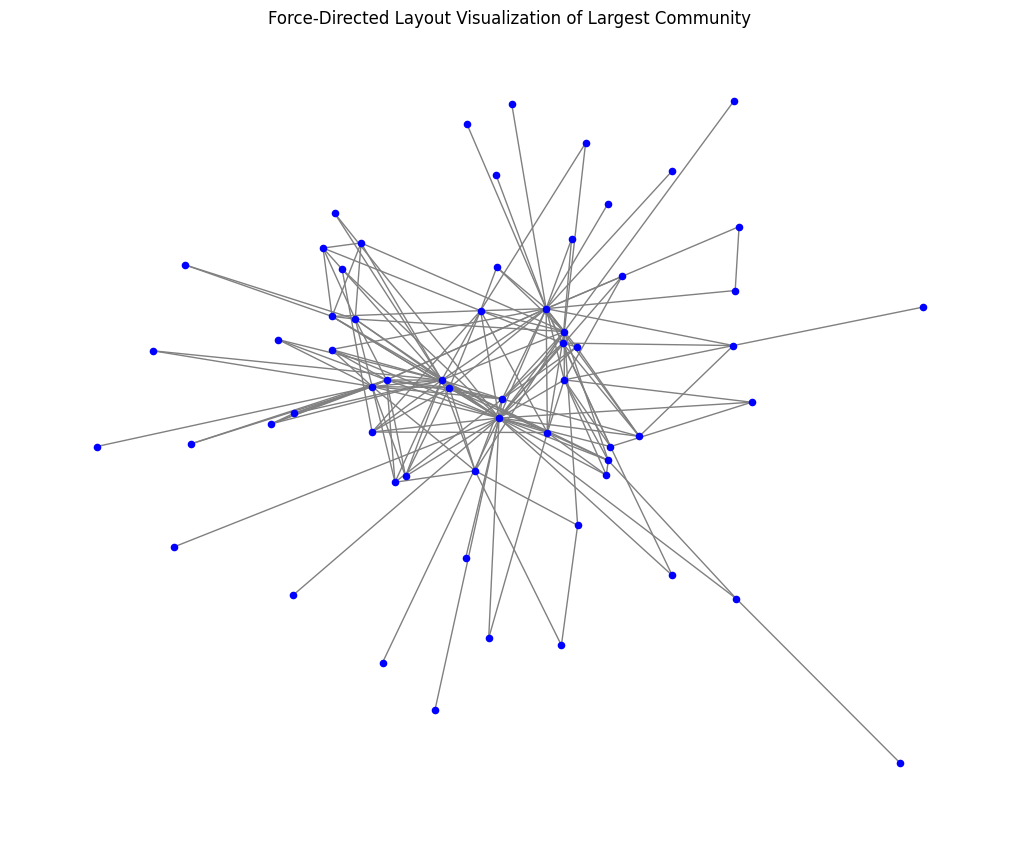

In [ ]:
communities = community.greedy_modularity_communities(G)
largest_community = max(communities, key=len)
subgraph = G.subgraph(largest_community)

# Visualisasi
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subgraph, k=0.05, iterations=20)  # Layout force-directed
nx.draw(subgraph, pos, node_size=20, node_color='blue', edge_color='gray', with_labels=False)
plt.title("Force-Directed Layout Visualization of Largest Community")
plt.show()

Kode tersebut menggunakan Layout force-directed digunakan untuk menyusun node-node secara visual agar node-node yang terhubung erat berada dekat satu sama lain. Visualisasi ini membantu dalam memahami struktur dan pola komunitas yang ada dalam jaringan.

## Report Writing

### 1. Pendahuluan
Analisis jaringan untuk memahami hubungan antarkarakter dalam serial "Game of Thrones" lebih dalam. dataset ini menampilkan hubungan antar karakter serta bobotnya. dalam analisis di lakukan analisis centrality untuk mengetahui peranan penting setiap node dalam jaringan dengan menggunakan 4 jenis centrality,kemudian melakukan analisis karakteristik untuk mengetahui jumlah nnode, edge, atribut dll, kemudian analisis komunitas untuk mengetahui hubungan dalam satu komunitas dalam jaringan dibandingakan dengan diluar kelompok dan terakhir dilakukan visualisasi untuk menampilkan tampilan jaringan.
### 2. Metodologi

#### a. Pengumpulan Data
Data diambil dari dataset yang mencatat hubungan antarkarakter dalam serial "Game of Thrones" yang didapat di internet.

#### b. Pembentukan Graf
Graf di bentuk dengan menempatkan karakter sebagai nodes dan hubungan antar karakter sebagai edges.
#### c. Analisis Centrality
analisis centrality dengan  degree centrality, betweenness centrality, closeness centrality, dan eigenvector centrality untuk mengetahui seberapa penting node dengn node yang lain.


#### d. Analisis Karakteristik Jaringan
Dilakukan analisis karakteristik jaringan untuk mengetahui average, degree , density dll.

#### e. Deteksi Komunitas
deteksi komunitas dilakukan dengan 2 algoritma yaitu girvan_newman dan label propagation.
#### f. Visualisasi
Graf jaringan divisualisasikan menggunakan library matplotlib dan seaborn kemudian menggunakan jenis visualisasi orce-directed graph karena sesuai untuk jaringan yg nnodenya banyak.

### 3. Analisis Hasil
#### a. Centrality Measures

Hasil analisis centrality menampilkan node-node yang paling signifikan dalam jaringan karakter "Game of Thrones" berdasarkan berbagai metrik centrality. penggunaan metrik degree centrality menunjukkan Eddard Stark sebagai node dengan degree centrality tertinggi dengan nilai 0.355 yang menandakan pentingnya posisi eddard dalam jaringan, selanjutnya Robert Baratheon, Tyrion Lannister, Catelyn Stark, dan Jon Snow. analisis metrik betweenness centrality menempatkan Eddard Stark mendapat nilai tertinggi. untuk  eigenvector centrality posisi tertinggi adalah Eddard Stark dengan demikian  analisis ini memberikan informasi tentang peranan atau pentingnya posisi tiap karakter pada jaringan.

#### b. Network Characteristics
setelah melakukan analisis karakteristik jaringan diperoleh jaringan ini memiliki 187 node dan 684 edge, yang menunjukkan bahwa ada banyak koneksi dalam jaringan graph. Density menunjukan 0.039 yang artinya sebagian kecil dari total kemungkinan koneksi antar karakter telah terwujud.average clustering coefficient jaringan adalah sekitar 0.512, menunjukkan bahwa ada kecenderungan untuk pembentukan klaster  secara lokal. yang berarti tiap karakter sendrung saling terhubung dengan kelompok kecilnya.

#### c. Community Detection
Deteksi komunitas digunakan untuk mendeteksi sebagaimana. erat hubungan antar karakter pemilihan Metode Girvan-Newman untuk mengidentifikasi komunitas dengan mencari celah dalam jaringan berdasarkan perbedaan struktur, sementara label propagation mencoba mengelompokkan node berdasarkan label yang ditransmisikan dari tetangga mereka".

pada Girvan-Newman mencakup beberapa besar karakter utama dan pendukung yang saling terhubung erat dalam alur cerita utama.sementara metode label propagation menghasilkan komunitas yang lebih kecil dan lebih terfokus.

#### d. Visualisasi
Visualisasimemberikan informasi inovatif. Beberapa karakter memiliki lebih banyak koneksi daripada yang lain. Dengan menggunakan warna dan label, visualisasi ini memungkinkan pengguna untuk dengan mudah mengidentifikasi node mana yang paling terkait atau memiliki peran yang lebih signifikan dalam cerita.

### 4. Interpretasi
Analisis jaringan  memberikan beberapa interpretasi yang menarik seperti karakter Eddard Stark, Robert Baratheon, dan Tyrion Lannister adalah karakter yang paling berpengaruh dalam jaringan, yang menunjukkan peran kunci mereka dalam cerita. selanjutnya  kelompok-kelompok dengan afiliasi yang kuat membentuk hubungan yang erat. dan terakhir visualisasi jaringan menggambarkan secara jelas bagaimana karakter-karakter saling terhubung dan membentuk kelompok-kelompok yang berbeda.

### 5. Kesimpulan
Analisis jaringan yang dilakukan menampilkan bentuk jaringan yang rumit antar karakter . Dengan menggunakan metode analisis seperti centralitas, komunitas, dan karakteristik jaringan, saya jadi mengetahui karakter-karakter kunci, kelompok-kelompok yang saling terhubung, serta sifat dan dinamika keseluruhan dari jaringan tersebut. Misalnya, karakter Eddard Stark muncul sebagai salah satu tokoh yang paling berpengaruh dalam jaringan kemudian Komunitas-komunitas yang terbentuk dalam jaringan juga memberikan gambaran tentang keadaan dalam jaringan kemudian Visualisasi membantu saya lebih memahami gambaran dari jaringan tersebut.